In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from MCMC_visu import quantiles_to_plot,quantiles_to_plot_calibration

In [8]:
nb_mcmc = 100
nb_classe = 8
nb_compartiment = 7

In [9]:


CLASSE = []
QUANTILES = []

file_path = '../data/MCMC_result/data_MCMC' + str(0) + '.csv'

for classe in range(nb_classe):
    # Initialisation des dictionnaires pour stocker les données
    data_S = {}
    data_I = {}
    data_R = {}
    data_Q = {}
    data_D = {}
    data_Q_entry = {}
    data_D_entry = {}

    CLASSE_temp = []
    CLASSE_temp.append(data_S)
    CLASSE_temp.append(data_I)
    CLASSE_temp.append(data_R)
    CLASSE_temp.append(data_Q)
    CLASSE_temp.append(data_D)
    CLASSE_temp.append(data_Q_entry)
    CLASSE_temp.append(data_D_entry)
    

    for i in range(nb_mcmc):
        file_path = '../data/MCMC_result/data_MCMC' + str(i) + '.csv'
        # Lecture du fichier CSV
        df = pd.read_csv(file_path)
        
        # Stockage des colonnes dans les dictionnaires
        CLASSE_temp[0][i] = df.iloc[:,classe*nb_compartiment + 0]
        CLASSE_temp[1][i] = df.iloc[:,classe*nb_compartiment + 1]
        CLASSE_temp[2][i] = df.iloc[:,classe*nb_compartiment + 2]
        CLASSE_temp[3][i] = df.iloc[:,classe*nb_compartiment + 3]
        CLASSE_temp[4][i] = df.iloc[:,classe*nb_compartiment + 4]
        CLASSE_temp[5][i] = df.iloc[:,classe*nb_compartiment + 5]
        CLASSE_temp[6][i] = df.iloc[:,classe*nb_compartiment + 6]

    # Création des DataFrames finaux
    CLASSE_temp[0] = pd.DataFrame(CLASSE_temp[0]).transpose()*17282163
    CLASSE_temp[1] = pd.DataFrame(CLASSE_temp[1]).transpose()*17282163
    CLASSE_temp[2] = pd.DataFrame(CLASSE_temp[2]).transpose()*17282163
    CLASSE_temp[3] = pd.DataFrame(CLASSE_temp[3]).transpose()*17282163
    CLASSE_temp[4] = pd.DataFrame(CLASSE_temp[4]).transpose()*17282163
    CLASSE_temp[5] = pd.DataFrame(CLASSE_temp[5]).transpose()*17282163
    CLASSE_temp[6] = pd.DataFrame(CLASSE_temp[6]).transpose()*17282163





    QUANTILES_temp = []

    QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))


    CLASSE.append(CLASSE_temp)
    QUANTILES.append(QUANTILES_temp)


#calcul du total

CLASSE_temp=CLASSE[0]
for classe in range(1,nb_classe):
    for comp in range(nb_compartiment):
            CLASSE_temp[comp] = CLASSE_temp[comp] + CLASSE[classe][comp]



QUANTILES_temp = []
QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))

QUANTILES.append(QUANTILES_temp)
CLASSE.append(CLASSE_temp)






In [10]:
file_path = '../data/MCMC_param/save_MCMC.csv'
parametres = pd.read_csv(file_path)
quantiles = parametres.quantile([0.25, 0.5, 0.75])
print(quantiles.transpose())

                 0.25      0.50      0.75
delta_0      0.000004  0.000006  0.000006
gamma_0      0.109886  0.111861  0.114584
eps_0        0.816905  0.828622  0.836719
r_0          0.010366  0.014284  0.019438
x0_infect_0  0.000041  0.000043  0.000044
...               ...       ...       ...
beta2_7      0.828075  0.841511  0.855847
beta3_7      0.308975  0.313884  0.328023
beta4_7      0.284129  0.287903  0.292626
beta5_7      0.022670  0.029932  0.042616
beta6_7      0.633358  0.645079  0.653173

[96 rows x 3 columns]


/tmp/ipykernel_56191/2614210405.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


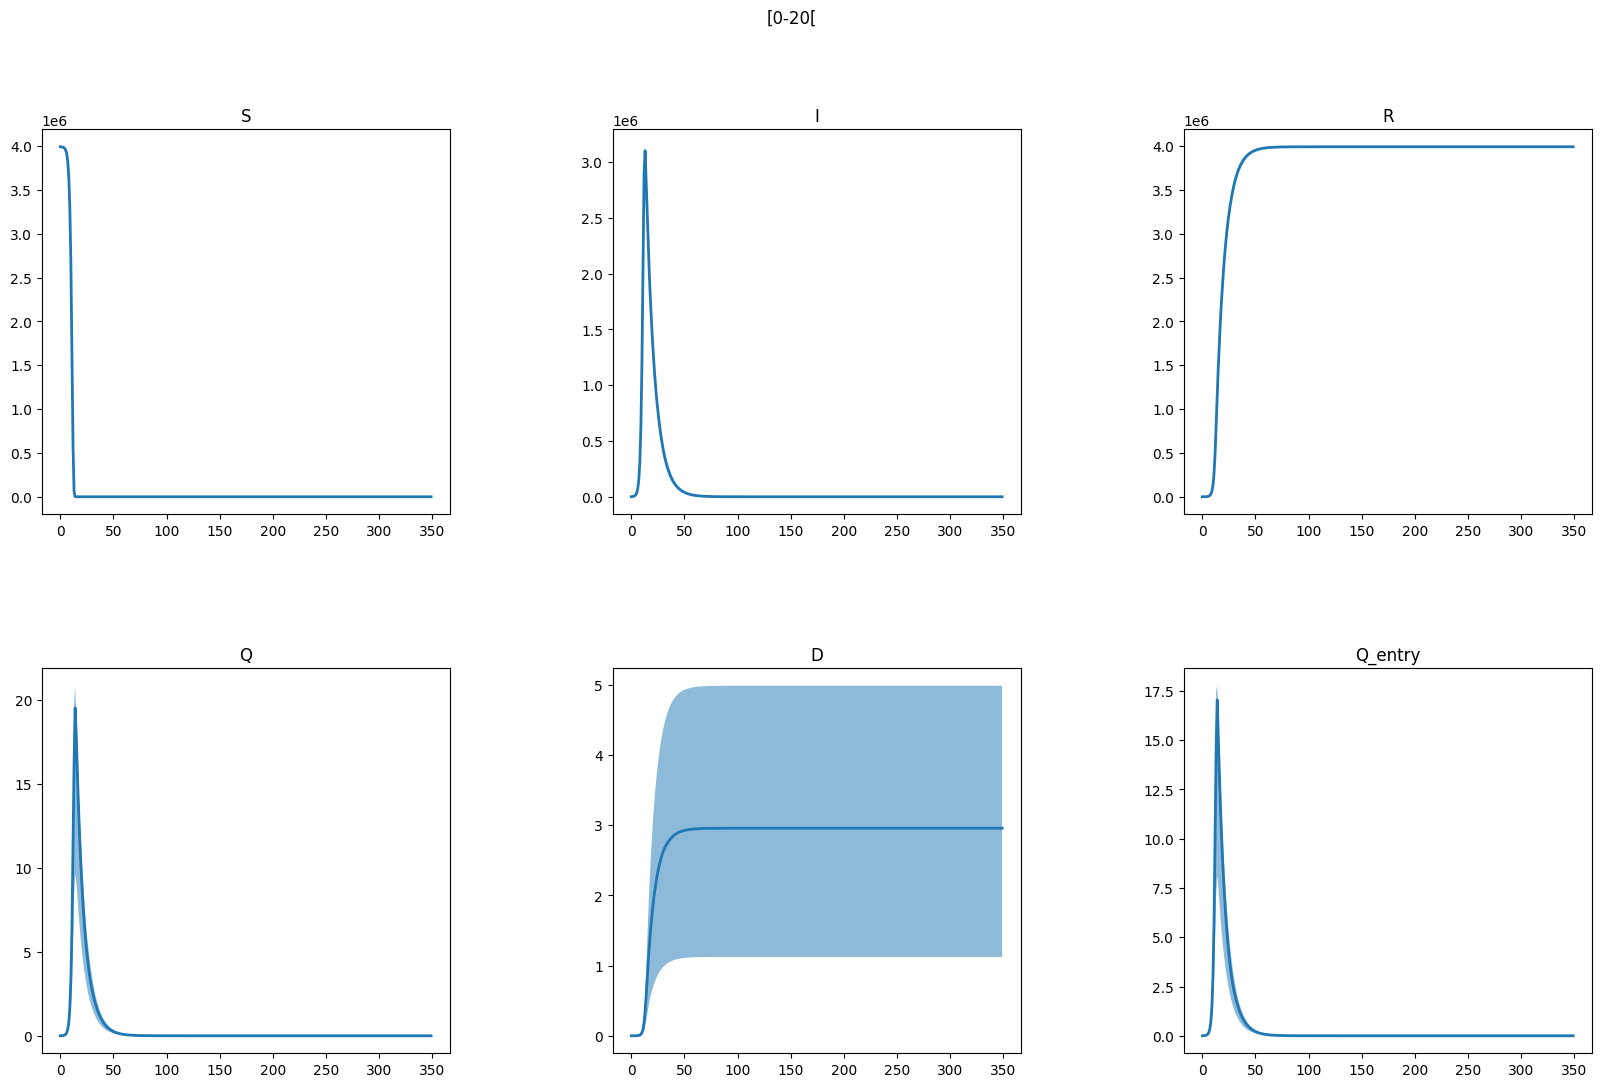

In [11]:

x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,0,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,0,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,0,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,0,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,0,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,0,5,ax[1][2],"Q_entry")
fig1.suptitle("[0-20[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_56191/2917875684.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


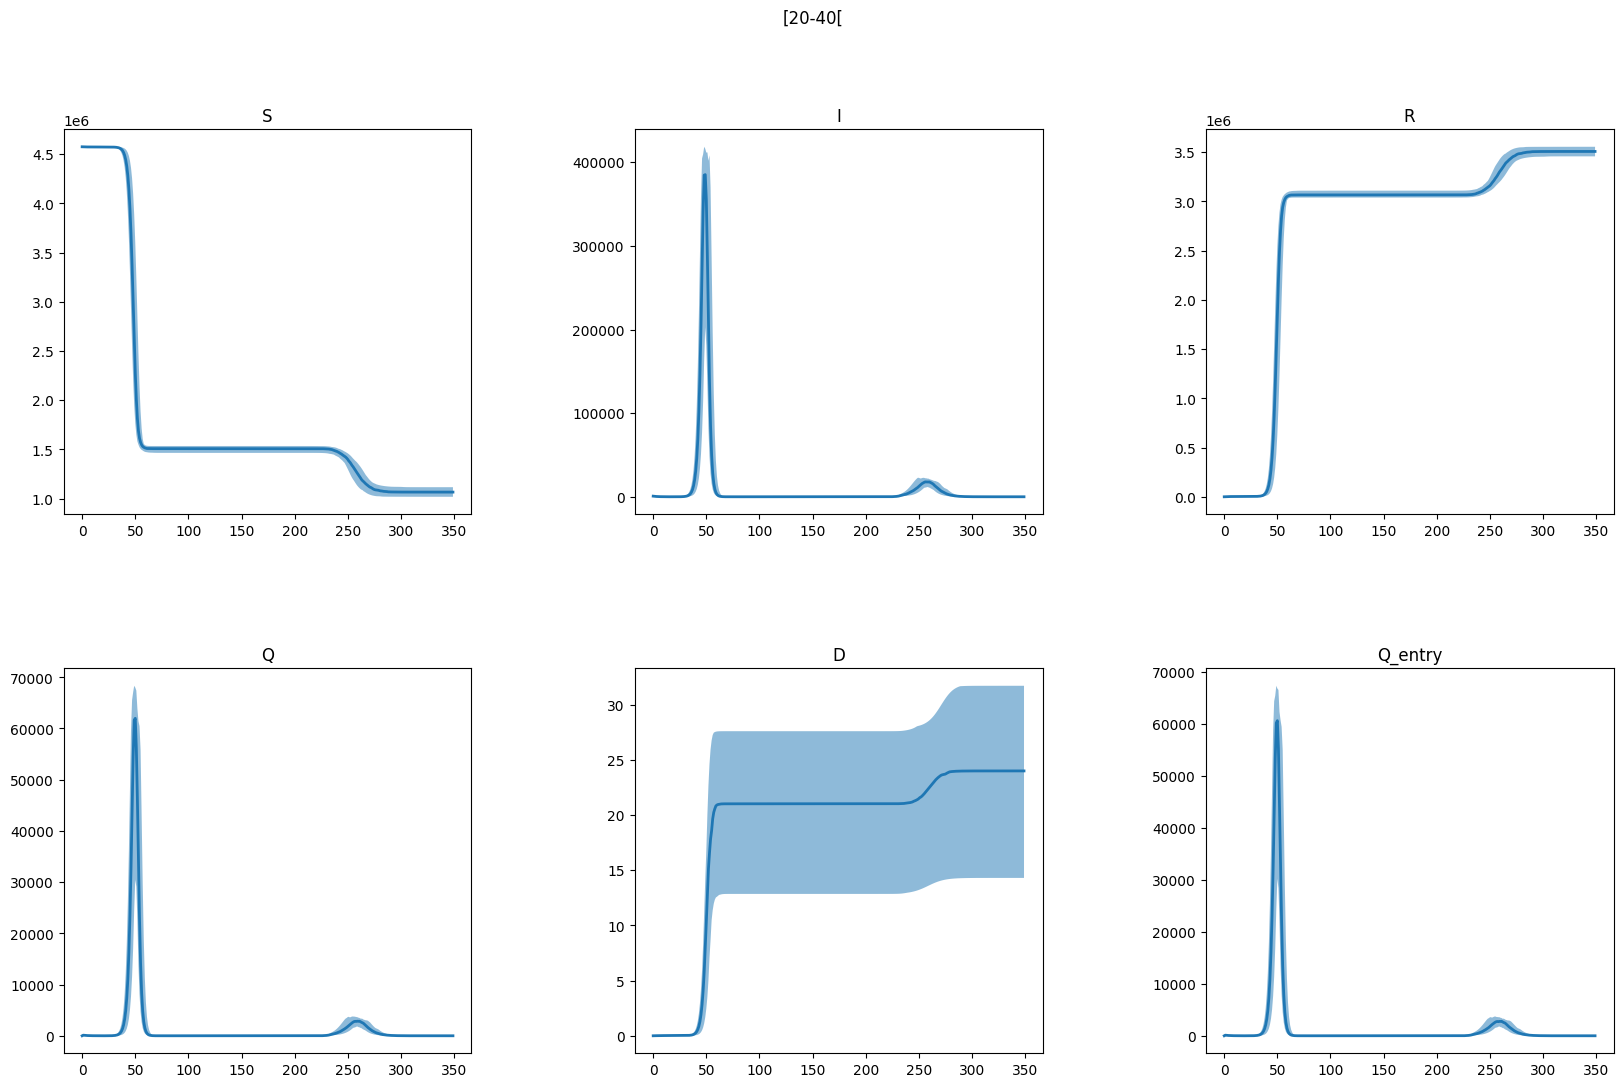

In [12]:
x = range(350)
fig2, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,1,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,1,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,1,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,1,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,1,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,1,5,ax[1][2],"Q_entry")
fig2.suptitle("[20-40[")
fig2.subplots_adjust(wspace=0.4, hspace=0.4)
fig2.show()

/tmp/ipykernel_56191/1695962148.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


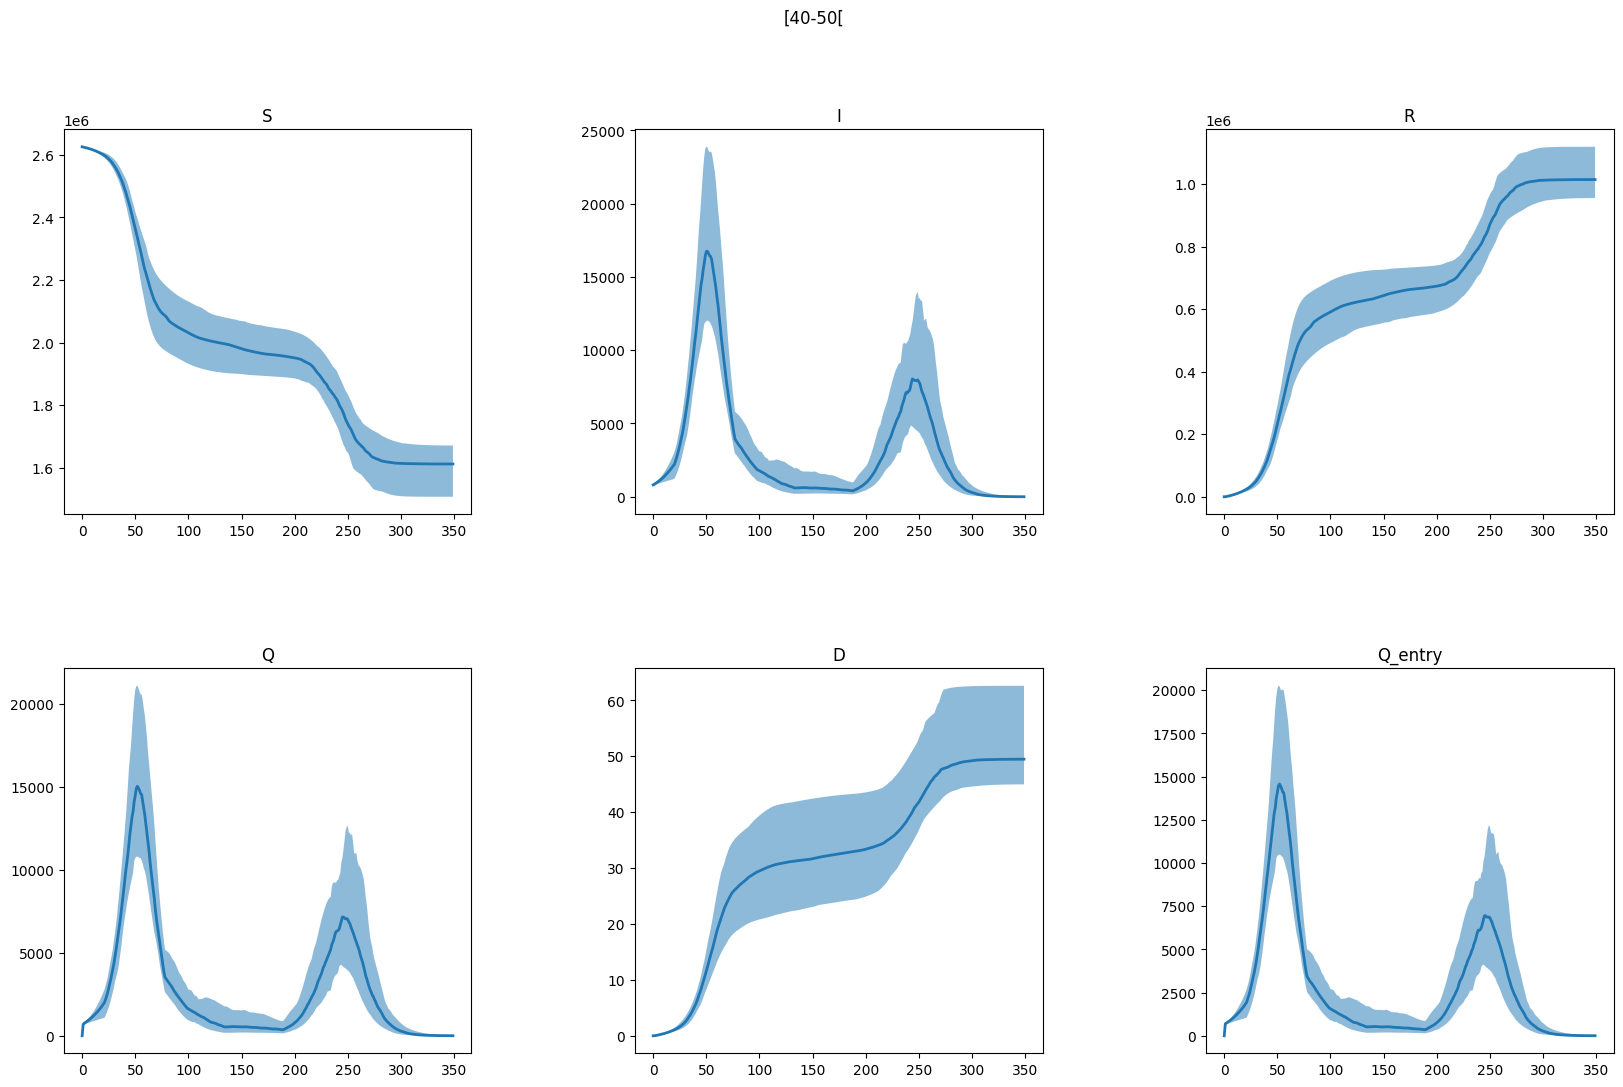

In [13]:
x = range(350)
fig2, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,2,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,2,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,2,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,2,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,2,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,2,5,ax[1][2],"Q_entry")
fig2.suptitle("[40-50[")
fig2.subplots_adjust(wspace=0.4, hspace=0.4)
fig2.show()

/tmp/ipykernel_56191/1068697552.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


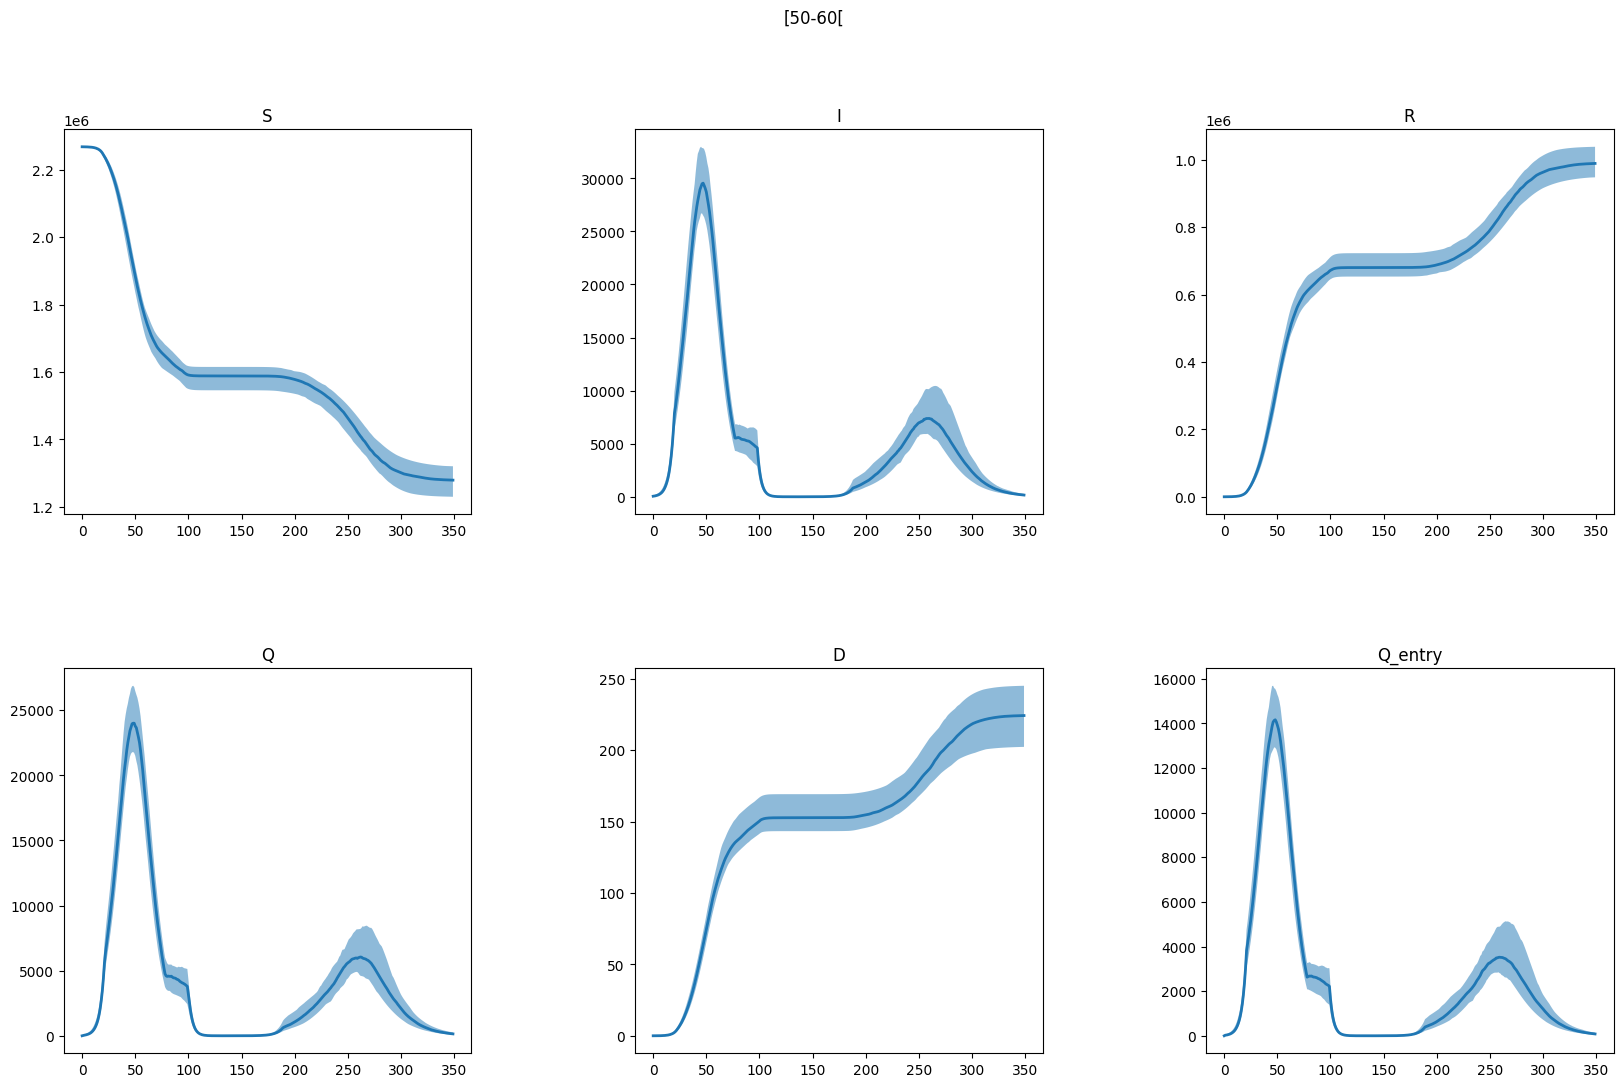

In [14]:
x = range(350)
fig2, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,3,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,3,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,3,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,3,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,3,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,3,5,ax[1][2],"Q_entry")
fig2.suptitle("[50-60[")
fig2.subplots_adjust(wspace=0.4, hspace=0.4)
fig2.show()

/tmp/ipykernel_56191/1931724372.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


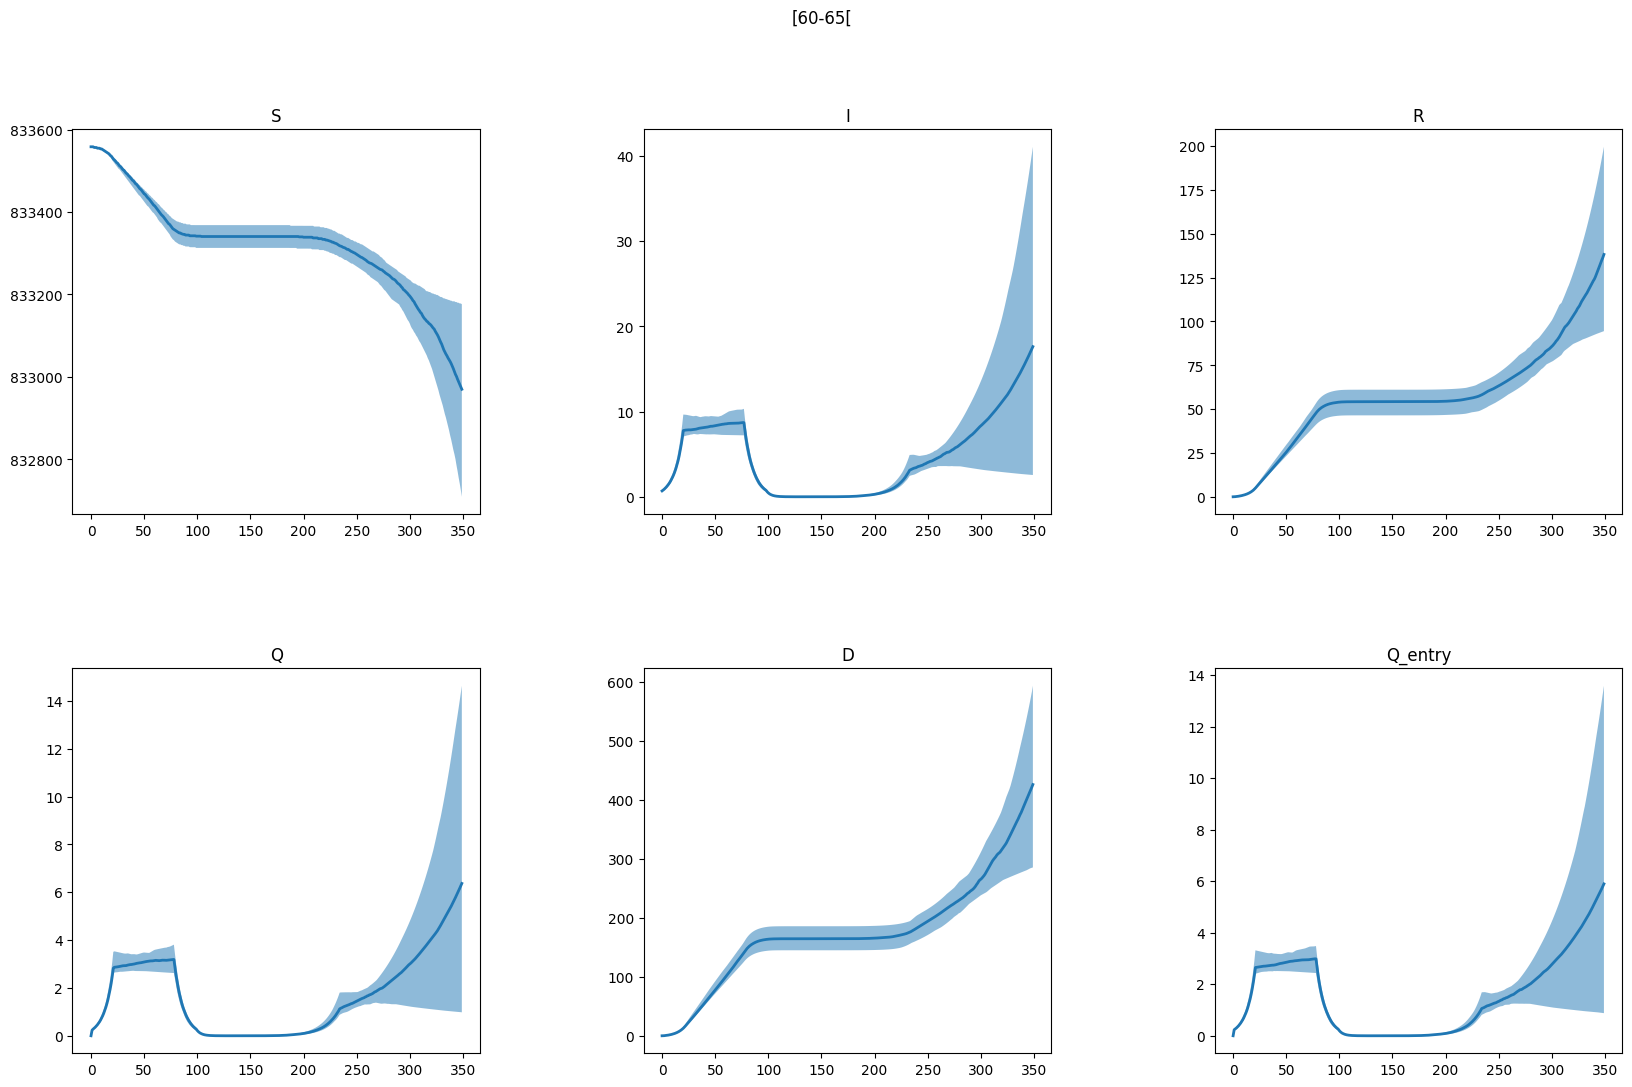

In [15]:

x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,4,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,4,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,4,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,4,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,4,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,4,5,ax[1][2],"Q_entry")
fig1.suptitle("[60-65[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_56191/240680997.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


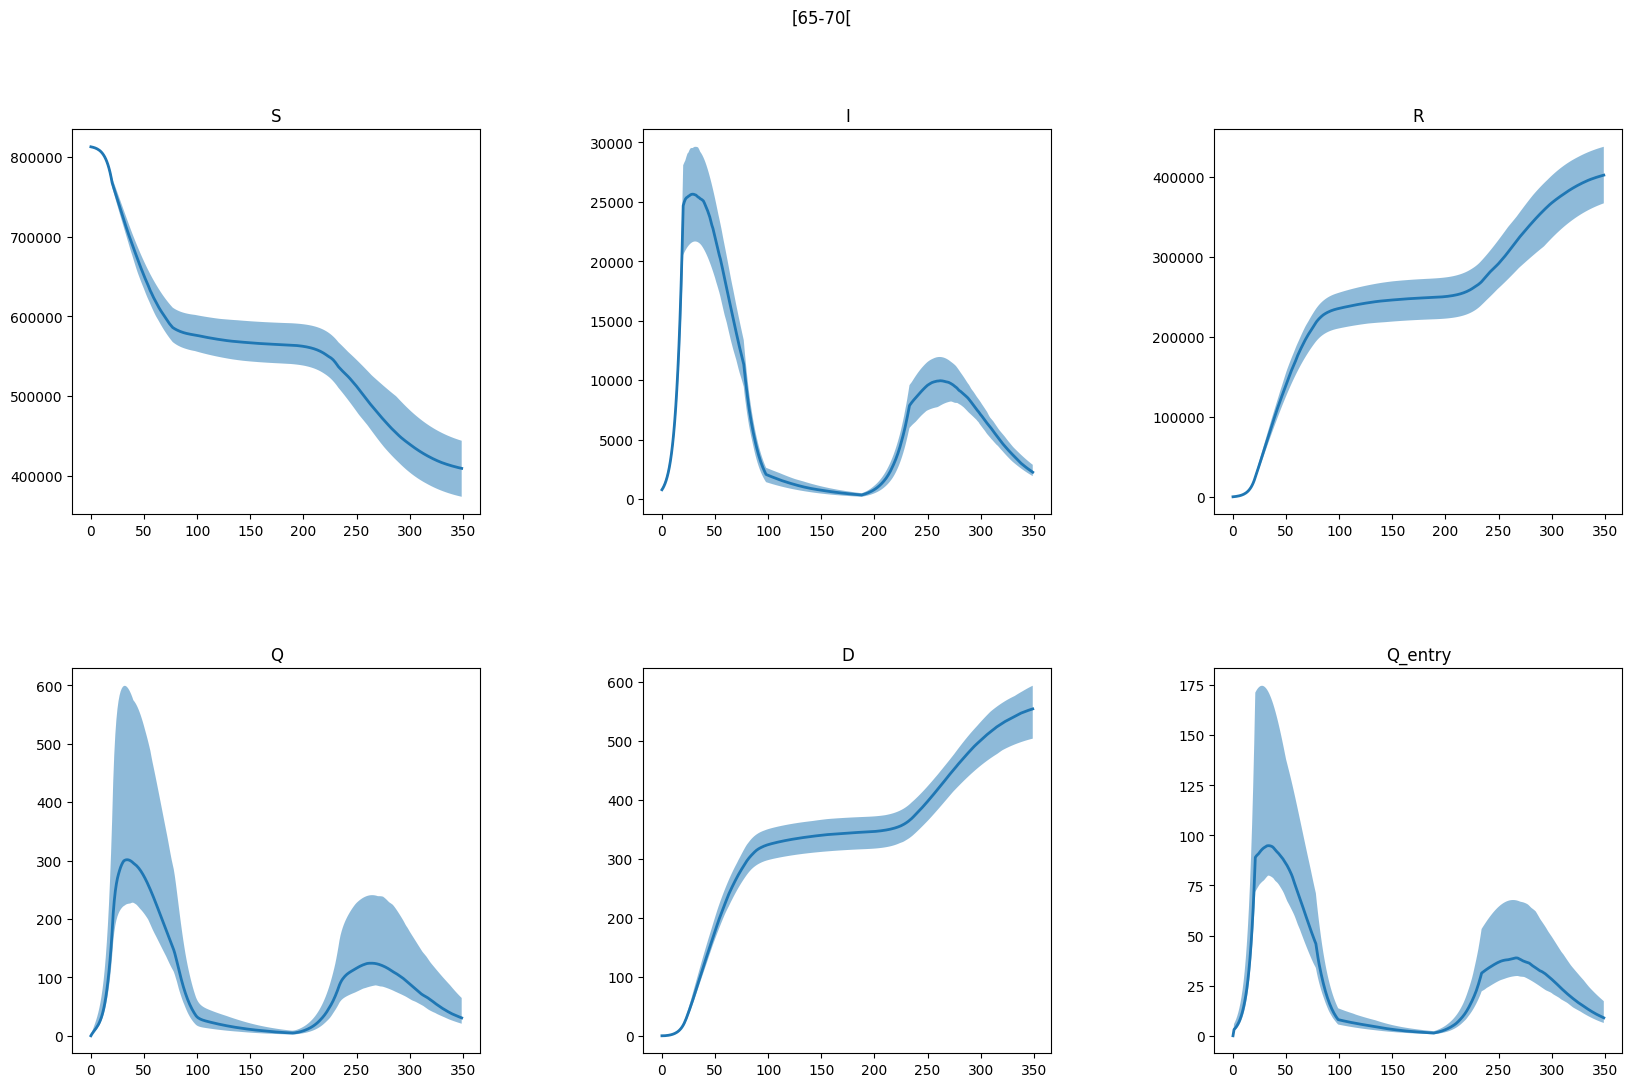

In [16]:

x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,5,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,5,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,5,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,5,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,5,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,5,5,ax[1][2],"Q_entry")
fig1.suptitle("[65-70[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_56191/2296555485.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


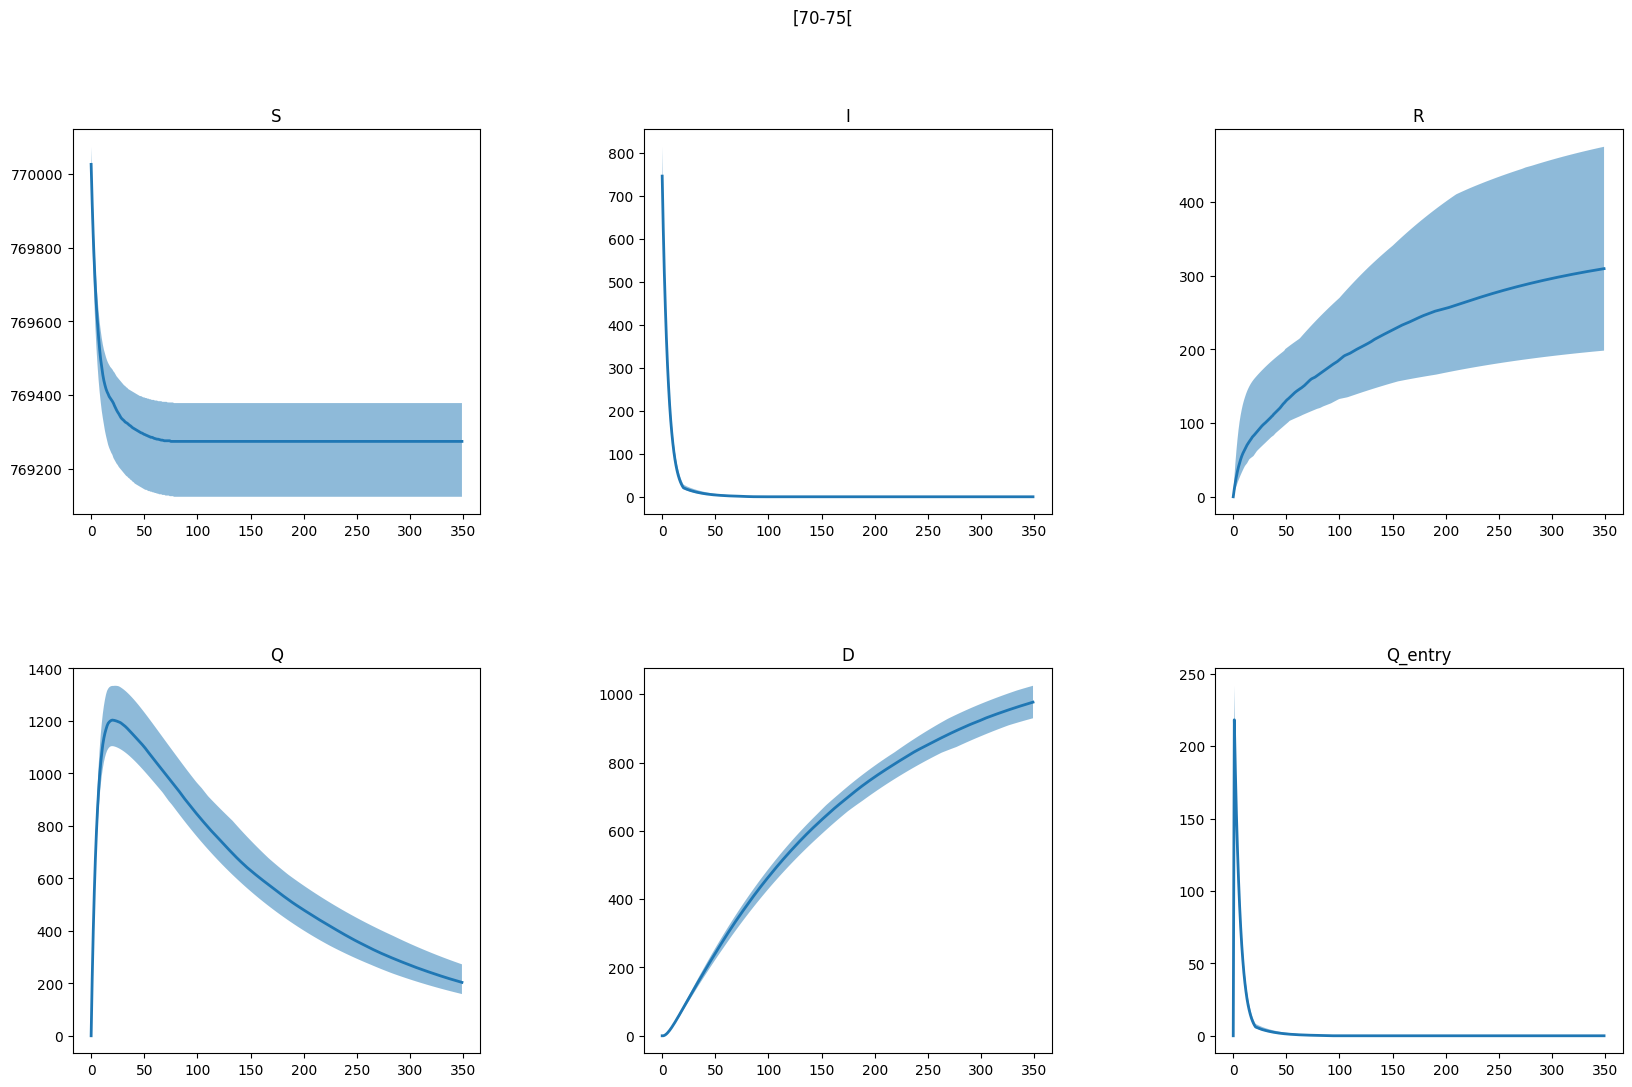

In [17]:

x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,6,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,6,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,6,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,6,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,6,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,6,5,ax[1][2],"Q_entry")
fig1.suptitle("[70-75[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_56191/847235782.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


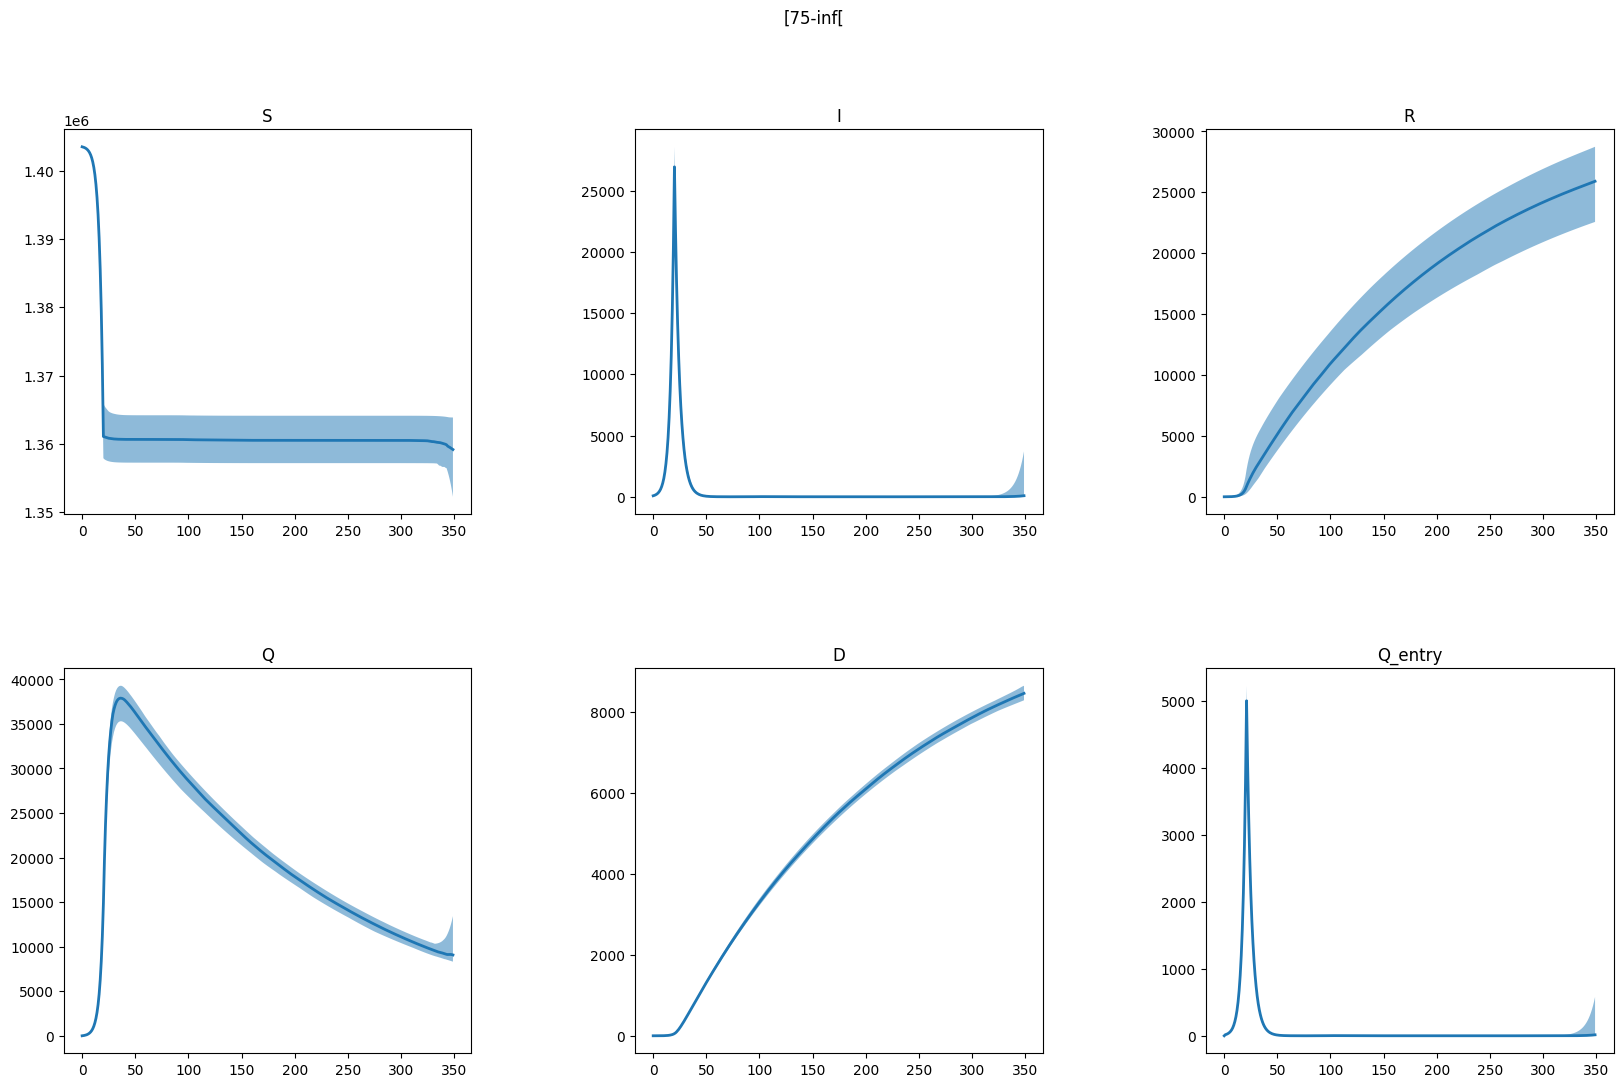

In [18]:

x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,7,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,7,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,7,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,7,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,7,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,7,5,ax[1][2],"Q_entry")
fig1.suptitle("[75-inf[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_56191/3958620252.py:46: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig3.show()


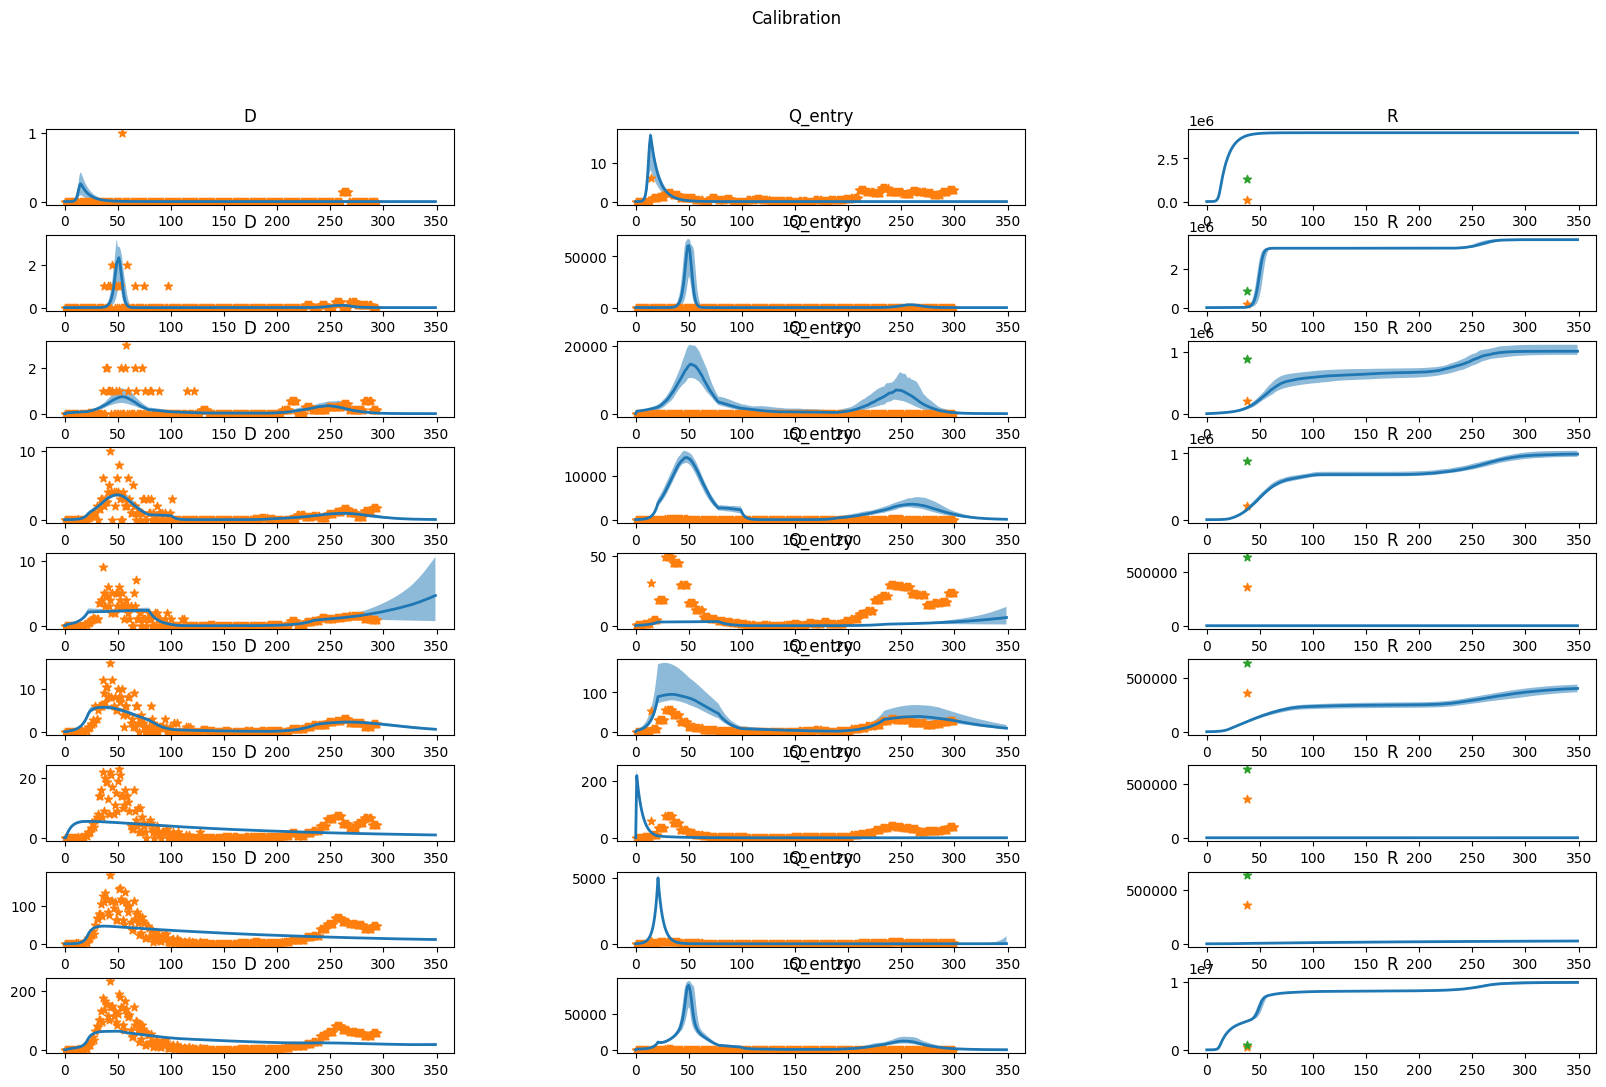

In [21]:
death_calibration = pd.read_csv('../data/DATA_calibration/8_classe/death_8.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/8_classe/hosp_8.csv')

x = range(350)
fig3, ax = plt.subplots(nrows=9,ncols=3,figsize=(20, 12))

quantiles_to_plot_calibration(x,QUANTILES,0,6,ax[0][0],"D",death_calibration['0-20'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,5,ax[0][1],"Q_entry",hosp_calibration['0-20'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,2,ax[0][2],"R",hosp_calibration['0-20'],1,0.006,0.075)

quantiles_to_plot_calibration(x,QUANTILES,1,6,ax[1][0],"D",death_calibration['20-40'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,5,ax[1][1],"Q_entry",hosp_calibration['20-40'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,2,ax[1][2],"R",hosp_calibration['20-40'],1,0.012,0.051)


quantiles_to_plot_calibration(x,QUANTILES,2,6,ax[2][0],"D",death_calibration['40-50'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,5,ax[2][1],"Q_entry",hosp_calibration['40-50'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,2,ax[2][2],"R",hosp_calibration['40-50'],1,0.012,0.051)

quantiles_to_plot_calibration(x,QUANTILES,3,6,ax[3][0],"D",death_calibration['50-60'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,3,5,ax[3][1],"Q_entry",hosp_calibration['50-60'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,3,2,ax[3][2],"R",hosp_calibration['50-60'],1,0.012,0.051)

quantiles_to_plot_calibration(x,QUANTILES,4,6,ax[4][0],"D",death_calibration['60-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,4,5,ax[4][1],"Q_entry",hosp_calibration['60-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,4,2,ax[4][2],"R",hosp_calibration['60-65'],1,0.021,0.037)

quantiles_to_plot_calibration(x,QUANTILES,5,6,ax[5][0],"D",death_calibration['65-70'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,5,5,ax[5][1],"Q_entry",hosp_calibration['65-70'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,5,2,ax[5][2],"R",hosp_calibration['65-70'],1,0.021,0.037)

quantiles_to_plot_calibration(x,QUANTILES,6,6,ax[6][0],"D",death_calibration['70-75'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,6,5,ax[6][1],"Q_entry",hosp_calibration['70-75'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,6,2,ax[6][2],"R",hosp_calibration['70-75'],1,0.021,0.037)

quantiles_to_plot_calibration(x,QUANTILES,7,6,ax[7][0],"D",death_calibration['75-inf'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,7,5,ax[7][1],"Q_entry",hosp_calibration['75-inf'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,7,2,ax[7][2],"R",hosp_calibration['75-inf'],1,0.021,0.037)

quantiles_to_plot_calibration(x,QUANTILES,8,6,ax[8][0],"D",death_calibration['total'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,8,5,ax[8][1],"Q_entry",hosp_calibration['total'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,8,2,ax[8][2],"R",hosp_calibration['total'],1,0.021,0.037)

fig3.suptitle("Calibration")
fig3.subplots_adjust(wspace=0.4, hspace=0.4)
fig3.show()




In [ ]:


CLASSE = []
QUANTILES = []



for classe in range(nb_classe):
    # Initialisation des dictionnaires pour stocker les données
    data_S = {}
    data_I = {}
    data_R = {}
    data_Q = {}
    data_D = {}
    data_Q_entry = {}
    data_D_entry = {}

    CLASSE_temp = []
    CLASSE_temp.append(data_S)
    CLASSE_temp.append(data_I)
    CLASSE_temp.append(data_R)
    CLASSE_temp.append(data_Q)
    CLASSE_temp.append(data_D)
    CLASSE_temp.append(data_Q_entry)
    CLASSE_temp.append(data_D_entry)
    

    for i in range(1):
        file_path = '../data/integration' + '.csv'
        # Lecture du fichier CSV
        df = pd.read_csv(file_path)
        
        # Stockage des colonnes dans les dictionnaires
        CLASSE_temp[0][i] = df.iloc[:,classe*nb_compartiment + 0]
        CLASSE_temp[1][i] = df.iloc[:,classe*nb_compartiment + 1]
        CLASSE_temp[2][i] = df.iloc[:,classe*nb_compartiment + 2]
        CLASSE_temp[3][i] = df.iloc[:,classe*nb_compartiment + 3]
        CLASSE_temp[4][i] = df.iloc[:,classe*nb_compartiment + 4]
        CLASSE_temp[5][i] = df.iloc[:,classe*nb_compartiment + 5]
        CLASSE_temp[6][i] = df.iloc[:,classe*nb_compartiment + 6]

    # Création des DataFrames finaux
    CLASSE_temp[0] = pd.DataFrame(CLASSE_temp[0]).transpose()*17282163
    CLASSE_temp[1] = pd.DataFrame(CLASSE_temp[1]).transpose()*17282163
    CLASSE_temp[2] = pd.DataFrame(CLASSE_temp[2]).transpose()*17282163
    CLASSE_temp[3] = pd.DataFrame(CLASSE_temp[3]).transpose()*17282163
    CLASSE_temp[4] = pd.DataFrame(CLASSE_temp[4]).transpose()*17282163
    CLASSE_temp[5] = pd.DataFrame(CLASSE_temp[5]).transpose()*17282163
    CLASSE_temp[6] = pd.DataFrame(CLASSE_temp[6]).transpose()*17282163





    QUANTILES_temp = []

    QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
    QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))


    CLASSE.append(CLASSE_temp)
    QUANTILES.append(QUANTILES_temp)


#calcul du total

CLASSE_temp=CLASSE[0]
for classe in range(1,nb_classe):
    for comp in range(nb_compartiment):
            CLASSE_temp[comp] = CLASSE_temp[comp] + CLASSE[classe][comp]



QUANTILES_temp = []
QUANTILES_temp.append(CLASSE_temp[0].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[1].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[2].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[3].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[4].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[5].quantile([0.05,0.5,0.95]))
QUANTILES_temp.append(CLASSE_temp[6].quantile([0.05,0.5,0.95]))

QUANTILES.append(QUANTILES_temp)
CLASSE.append(CLASSE_temp)


IndexError: single positional indexer is out-of-bounds

In [ ]:
file_path = '../data/save_dir/save_SIRQD_2classe_mads.csv'
parametres_mads = pd.read_csv(file_path)

print(parametres_mads.transpose())

quantiles = parametres.quantile([0.25, 0.5, 0.75])
print(quantiles.transpose())




                    0
delta_0      0.000005
gamma_0      0.003250
eps_0        0.950601
r_0          0.044784
x0_infect_0  0.000289
beta0_0      0.010646
beta1_0      0.072153
beta2_0      0.001746
beta3_0      0.000687
beta4_0      0.061927
beta5_0      0.000004
beta6_0      0.197436
delta_1      0.003609
gamma_1      0.144749
eps_1        0.022082
r_1          0.034779
x0_infect_1  0.000195
beta0_1      0.147946
beta1_1      0.053661
beta2_1      0.027164
beta3_1      0.064410
beta4_1      0.086540
beta5_1      0.108727
beta6_1      0.074401
                 0.25      0.50      0.75
delta_0      0.261526  0.265198  0.267064
gamma_0      0.200240  0.203176  0.206049
eps_0        0.109106  0.111567  0.113392
r_0          0.000198  0.000202  0.000204
x0_infect_0  0.000002  0.000002  0.000002
beta0_0      0.986701  0.992413  0.997206
beta1_0      0.553523  0.561266  0.566471
beta2_0      0.643961  0.650700  0.664757
beta3_0      0.602158  0.613016  0.619783
beta4_0      0.757346  0.77003

/tmp/ipykernel_16580/1284647377.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


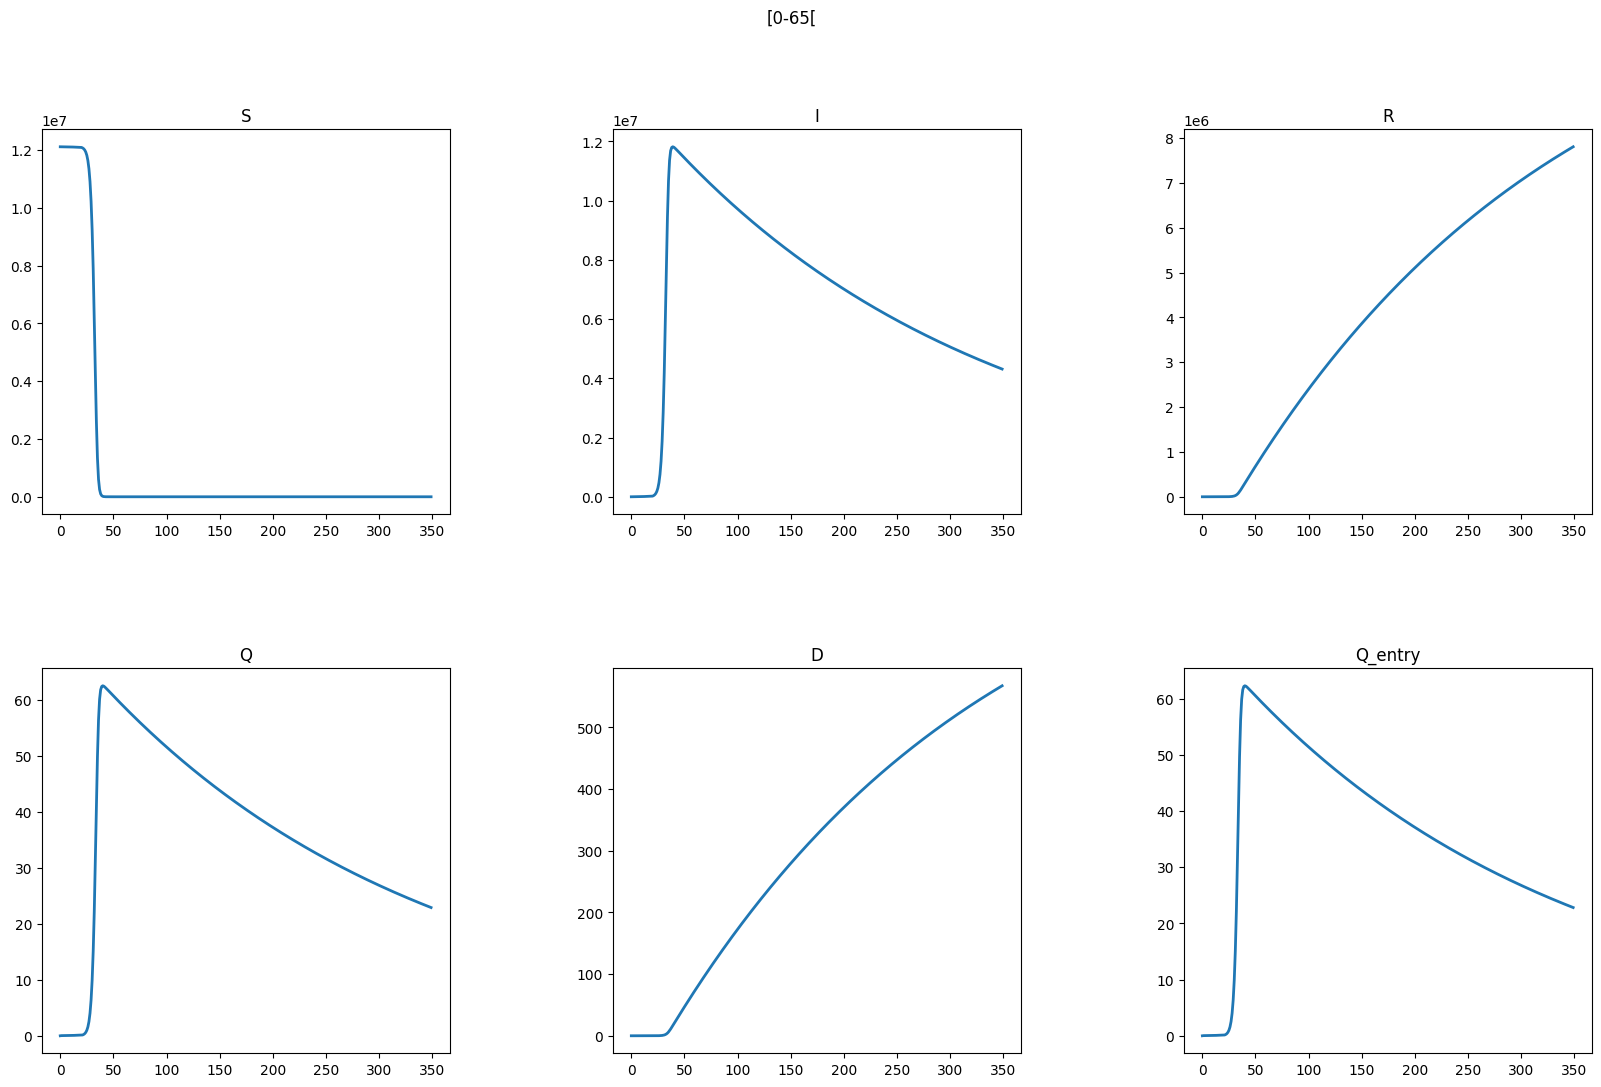

In [ ]:
x = range(350)
fig1, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,0,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,0,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,0,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,0,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,0,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,0,5,ax[1][2],"Q_entry")
fig1.suptitle("[0-65[")
fig1.subplots_adjust(wspace=0.4, hspace=0.4)
fig1.show()

/tmp/ipykernel_16580/3039041559.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


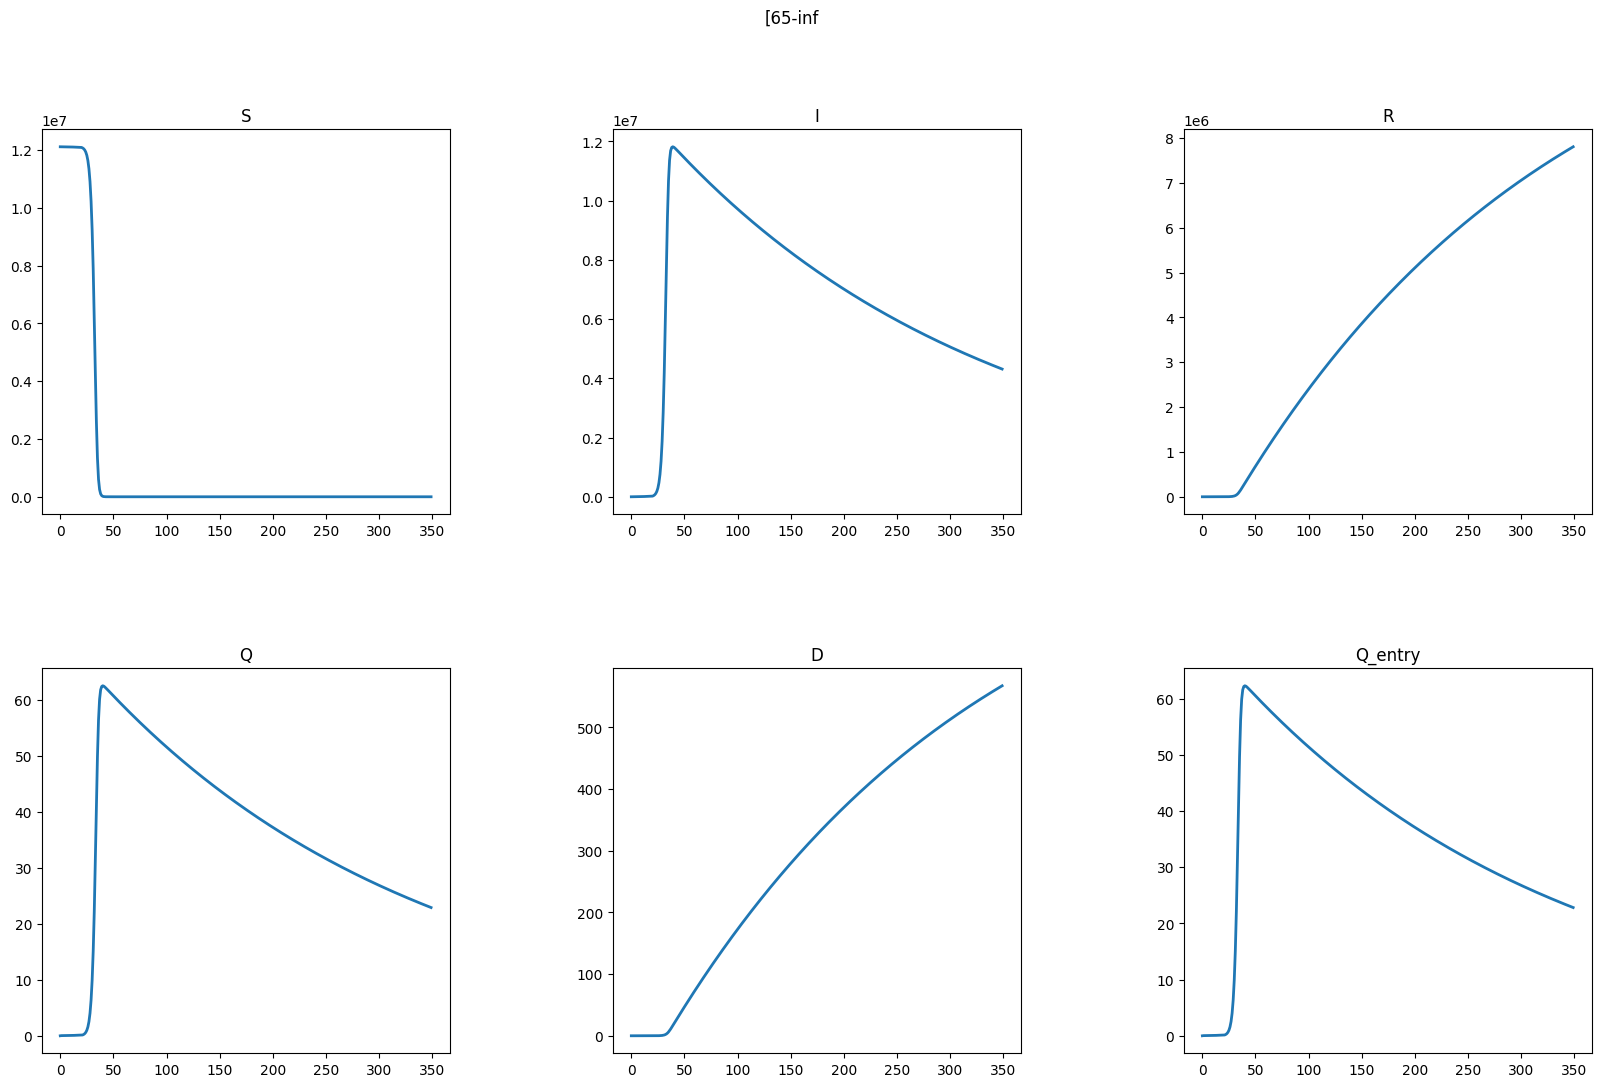

In [ ]:
x = range(350)
fig2, ax = plt.subplots(nrows=2,ncols=3,figsize=(20, 12))
quantiles_to_plot(x,QUANTILES,1,0,ax[0][0],"S")
quantiles_to_plot(x,QUANTILES,1,1,ax[0][1],"I")
quantiles_to_plot(x,QUANTILES,1,2,ax[0][2],"R")
quantiles_to_plot(x,QUANTILES,1,3,ax[1][0],"Q")
quantiles_to_plot(x,QUANTILES,1,4,ax[1][1],"D")
quantiles_to_plot(x,QUANTILES,1,5,ax[1][2],"Q_entry")
fig2.suptitle("[65-inf")
fig2.subplots_adjust(wspace=0.4, hspace=0.4)
fig2.show()

In [ ]:
death_calibration = pd.read_csv('../data/DATA_calibration/0-65_65-inf/day_death_csv_0-65_65-inf.csv')
hosp_calibration = pd.read_csv('../data/DATA_calibration/0-65_65-inf/day_hosp_csv_0-65_65-inf.csv')

x = range(350)
fig3, ax = plt.subplots(nrows=3,ncols=3,figsize=(20, 12))
quantiles_to_plot_calibration(x,QUANTILES,0,6,ax[0][0],"D_entry",death_calibration['0-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,5,ax[0][1],"Q_entry",hosp_calibration['0-65'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,0,2,ax[0][2],"Q_entry",hosp_calibration['0-65'],1,0.006,0.075)

quantiles_to_plot_calibration(x,QUANTILES,1,6,ax[1][0],"D_entry",death_calibration['65-inf'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,5,ax[1][1],"Q_entry",hosp_calibration['65-inf'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,1,2,ax[1][2],"R",hosp_calibration['65-inf'],1,0.012,0.051)

quantiles_to_plot_calibration(x,QUANTILES,2,6,ax[2][0],"D_entry",death_calibration['all'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,5,ax[2][1],"Q_entry",hosp_calibration['all'],0,0,0)
quantiles_to_plot_calibration(x,QUANTILES,2,2,ax[2][2],"R",hosp_calibration['all'],1,0.021,0.037)

fig3.suptitle("Calibration")
fig3.subplots_adjust(wspace=0.4, hspace=0.4)
fig3.show()

FileNotFoundError: [Errno 2] No such file or directory: '../data/DATA_calibration/0-65_65-inf/day_death_csv_0-65_65-inf.csv'